In [1]:
# import sys
# !{sys.executable} -m pip install --upgrade tensorflow 
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
from tensorflow.python.util import deprecation
import os
import logging
import seaborn as sns
import janitor
import tabulate
from tqdm import tqdm
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2022-06-01 12:18:05.640399: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
print(tf.__version__)


2.9.1


In [3]:

Glam = pd.read_csv('Glam.csv')
Glam = Glam[[
#         'LAT',
#         'LON',
    'CenLon',
    'CenLat',
    'Area',
    'thickness',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Aspect'
]]
# split data for training and validation
(train_features, test_features, train_labels, test_labels) = gl.data_splitter(Glam)

# define model hyperparameters
LR = np.logspace(-3,2,6)
vs = 0.2
VS = 0.1,0.15,0.2,0.25,0.3,0.35,0.4
RS = range(0,25,1)
ep = 300

# name databases
Glam.name = 'Glam'

"""
Here we evaluate models and make predictions, then display the zults
"""
rootdir = 'sm2/'
# print(rootdir)
dnn_model={}
predictions = pd.DataFrame()

for arch in tqdm(os.listdir(rootdir)):
    for folder in os.listdir(rootdir+arch):
        if 'MULTI' in folder and 'dnn' in folder:
            
            if '0.1' in folder:
                dnn_model[arch[3:]+'_'+folder] = tf.keras.models.load_model(rootdir 
                    + arch 
                    + '/' 
                    + folder)

                mae_test = dnn_model[arch[3:]+'_'+folder].evaluate(test_features,
                                                             test_labels,verbose=0)

                mae_train = dnn_model[arch[3:]+'_'+folder].evaluate(train_features,
                                             train_labels,verbose=0)

                pred_train = dnn_model[arch[3:]+'_'+folder].predict(train_features,verbose=0)

                pred_test = dnn_model[arch[3:]+'_'+folder].predict(test_features,verbose=0)
                avg_thickness = pd.Series((np.sum(pred_train) / len(pred_train)), name = 'avg train thickness')

                avg_test_thickness = pd.Series((np.sum(pred_test) / len(pred_test)),  name = 'avg test thickness')
                temp_df = pd.merge(avg_thickness, avg_test_thickness, right_index=True, left_index=True)
                predictions = predictions.append(temp_df, ignore_index=True)
                predictions.loc[predictions.index[-1], 'model']= folder
                predictions.loc[predictions.index[-1], 'test mae']= mae_test
                predictions.loc[predictions.index[-1], 'train mae']= mae_train
                predictions.loc[predictions.index[-1], 'architecture']= arch[3:]
                predictions.loc[predictions.index[-1], 'learning rate']= '0.1'
                predictions.loc[predictions.index[-1], 'validation split']= '0.2'
                
            if '0.01' in folder:
                dnn_model[arch[3:]+'_'+folder] = tf.keras.models.load_model(rootdir 
                    + arch 
                    + '/' 
                    + folder)

                mae_test = dnn_model[arch[3:]+'_'+folder].evaluate(test_features,
                                                             test_labels,verbose=0)

                mae_train = dnn_model[arch[3:]+'_'+folder].evaluate(train_features,
                                             train_labels,verbose=0)

                pred_train = dnn_model[arch[3:]+'_'+folder].predict(train_features, verbose=0)

                pred_test = dnn_model[arch[3:]+'_'+folder].predict(test_features,verbose=0)
                avg_thickness = pd.Series((np.sum(pred_train) / len(pred_train)), name = 'avg train thickness')

                avg_test_thickness = pd.Series((np.sum(pred_test) / len(pred_test)),  name = 'avg test thickness')
                temp_df = pd.merge(avg_thickness, avg_test_thickness, right_index=True, left_index=True)
                predictions = predictions.append(temp_df, ignore_index=True)
                predictions.loc[predictions.index[-1], 'model']= folder
                predictions.loc[predictions.index[-1], 'test mae']= mae_test
                predictions.loc[predictions.index[-1], 'train mae']= mae_train
                predictions.loc[predictions.index[-1], 'architecture']= arch[3:]
                predictions.loc[predictions.index[-1], 'learning rate']= '0.01'
                predictions.loc[predictions.index[-1], 'validation split']= '0.2'          
            
            if '0.001' in folder:
                dnn_model[arch[3:]+'_'+folder] = tf.keras.models.load_model(rootdir 
                    + arch 
                    + '/' 
                    + folder)

                mae_test = dnn_model[arch[3:]+'_'+folder].evaluate(test_features,
                                                             test_labels,verbose=0)

                mae_train = dnn_model[arch[3:]+'_'+folder].evaluate(train_features,
                                             train_labels,verbose=0)

                pred_train = dnn_model[arch[3:]+'_'+folder].predict(train_features,verbose=0)

                pred_test = dnn_model[arch[3:]+'_'+folder].predict(test_features,verbose=0)
                avg_thickness = pd.Series((np.sum(pred_train) / len(pred_train)), name = 'avg train thickness')

                avg_test_thickness = pd.Series((np.sum(pred_test) / len(pred_test)),  name = 'avg test thickness')
                temp_df = pd.merge(avg_thickness, avg_test_thickness, right_index=True, left_index=True)
                predictions = predictions.append(temp_df, ignore_index=True)
                predictions.loc[predictions.index[-1], 'model']= folder
                predictions.loc[predictions.index[-1], 'test mae']= mae_test
                predictions.loc[predictions.index[-1], 'train mae']= mae_train
                predictions.loc[predictions.index[-1], 'architecture']= arch[3:]            
                predictions.loc[predictions.index[-1], 'learning rate']= '0.001'
                predictions.loc[predictions.index[-1], 'validation split']= '0.2'                
                
predictions.rename(columns = {0:'avg train thickness'},inplace = True)

# these models are ridiculous, so we drop them.
# idx = predictions.index[predictions['architecture']=='64']
# predictions = predictions.drop(predictions.loc[idx].index)


"""
Here we compute for each layer architecture avg mae, mae std dev, and
prediction std dev.
"""
deviations = pd.DataFrame()
for architecture in list(predictions['architecture'].unique()):
    for learning_rate in list(predictions['learning rate'].unique()):
        # define temp dataframe for calculations that contains only one layer architecture
#         df = (predictions[predictions['architecture'] == architecture]) and (predictions[predictions['learning rate'] == str(learning_rate)])
        df = predictions[(predictions['architecture'] == architecture) & (predictions['learning rate' ]== learning_rate)]
#         break
#         print(df)
        # step 1: calculate mean of numbers
        test_mae_mean = np.sum(df['test mae']) / len(df) 

        diff_sq = pd.Series()

        for test_mae in df['test mae']:
            # step 2: subtract the mean from each, then square the result
            step_2 = pd.Series((test_mae - test_mae_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)

        # step 3: work out the mean of the squared differences    
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))

        # step 4: take the square root
        test_mae_std_dev = np.sqrt(mean_diff_sq)


       # repeat for train mae 

        # step 1: calculate mean of numbers
        train_mae_mean = np.sum(df['train mae']) / len(df) 

        diff_sq = pd.Series()

        for train_mae in df['train mae']:
            # step 2: subtract the mean from each, then square the result
            step_2 = pd.Series((train_mae - train_mae_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)

        # step 3: work out the mean of the squared differences    
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))

        # step 4: take the square root
        train_mae_std_dev = np.sqrt(mean_diff_sq)

        # repeat process for train thicknesses
        thickness_train_mean = np.sum(df['avg train thickness']) / len(df)   
        for thickness in df['avg train thickness']:
            step_2 = pd.Series((thickness - thickness_train_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))
        train_thickness_std_dev = np.sqrt(mean_diff_sq)


        # repeat process for test thicknesses
        thickness_test_mean = np.sum(df['avg test thickness']) / len(df)   
        for thickness in df['avg test thickness']:
            step_2 = pd.Series((thickness - thickness_test_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))
        test_thickness_std_dev = np.sqrt(mean_diff_sq)

        # turn the last number computed into a series so it may be appended to build the table.
        # it will be dropped later, no worries.
        test_thick_std_dev = pd.Series(test_thickness_std_dev)

        deviations = deviations.append(test_thick_std_dev, ignore_index=True)
        deviations.loc[deviations.index[-1], 'layer architecture']= architecture
        deviations.loc[deviations.index[-1], 'model parameters'] = dnn_model[architecture + '_Glam_dnn_MULTI_0.1_0.2_300_0'].count_params()
        deviations.loc[deviations.index[-1], 'learning rate']= learning_rate
        deviations.loc[deviations.index[-1], 'validation split']= 0.2
        deviations.loc[deviations.index[-1], 'test mae avg'] = test_mae_mean
        deviations.loc[deviations.index[-1], 'train mae avg']= train_mae_mean
        deviations.loc[deviations.index[-1], 'test mae std dev']= test_mae_std_dev
        deviations.loc[deviations.index[-1], 'train mae std dev']= train_mae_std_dev
        deviations.loc[deviations.index[-1], 'test predicted thickness std dev']= test_thickness_std_dev
        deviations.loc[deviations.index[-1], 'train predicted thickness std dev']= train_thickness_std_dev
# bootstrapped ensembles for predicted column    
#drop that appended line from earlier. Probably a better way to go about it
deviations.drop(columns = {0},inplace = True)    
deviations = deviations.dropna()
deviations.sort_values('test mae avg')


  0%|          | 0/5 [00:00<?, ?it/s]2022-06-01 12:18:07.273492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-06-01 12:18:07.273514: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-06-01 12:18:07.273755: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate c

,layer architecture,model parameters,learning rate,validation split,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
10,10-5,168.0,0.01,0.2,17.670567,12.744849,0.679880,0.843327,1.090071,0.905652
2,16-8,306.0,0.001,0.2,18.308925,14.548954,0.218444,0.280178,0.384305,0.353112
4,12-6,210.0,0.01,0.2,18.319958,12.050961,0.851421,1.096475,1.206123,1.028272
1,16-8,306.0,0.01,0.2,18.322421,11.700051,1.103772,0.861498,1.318386,0.962624
5,12-6,210.0,0.001,0.2,18.609337,14.747237,0.317896,0.245189,0.451783,0.419643
14,8-4,130.0,0.001,0.2,19.018690,15.172641,0.454905,0.330150,0.543278,0.553481
13,8-4,130.0,0.01,0.2,19.246012,14.295843,3.809324,4.364966,6.337331,5.800722
9,10-5,168.0,0.1,0.2,19.761632,12.292652,1.246131,1.633289,2.115127,1.789434
11,10-5,168.0,0.001,0.2,19.901357,16.242461,5.787727,6.078379,7.712083,7.255176
12,8-4,130.0,0.1,0.2,20.047016,13.341808,2.385893,2.433213,3.162398,2.551610


In [4]:
rootdir = '/data/fast0/datasets/rgi60-attribs/'
RGI_extra = pd.DataFrame()
for file in os.listdir(rootdir):
    print(file)
    f = pd.read_csv(rootdir+file, encoding_errors = 'replace', on_bad_lines = 'skip')
    RGI_extra = RGI_extra.append(f, ignore_index = True)

RGI = RGI_extra[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect'
]]
RGI

01_rgi60_Alaska.csv
02_rgi60_WesternCanadaUS.csv
03_rgi60_ArcticCanadaNorth.csv
04_rgi60_ArcticCanadaSouth.csv
05_rgi60_GreenlandPeriphery.csv
06_rgi60_Iceland.csv
07_rgi60_Svalbard.csv
08_rgi60_Scandinavia.csv
09_rgi60_RussianArctic.csv
10_rgi60_NorthAsia.csv
11_rgi60_CentralEurope.csv
12_rgi60_CaucasusMiddleEast.csv
13_rgi60_CentralAsia.csv
14_rgi60_SouthAsiaWest.csv
15_rgi60_SouthAsiaEast.csv
16_rgi60_LowLatitudes.csv
17_rgi60_SouthernAndes.csv
18_rgi60_NewZealand.csv
19_rgi60_AntarcticSubantarctic.csv


,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect
0,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346
1,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162
2,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175
3,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195
4,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181
...,...,...,...,...,...,...,...,...
216496,-53.9860,-37.7325,29.9,310,-999,510,0.042,315
216497,-54.8310,-36.1361,23.6,330,-999,830,0.567,200
216498,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308
216499,-68.8656,-90.4266,0.4,170,-999,270,0.011,122


In [5]:
"""
This cell contains code to predict thicknesses across all 25 of the top performing ensemble model
"""
dfs = pd.DataFrame()
for rs in tqdm(RS):
    df = deviations.iloc[:1]
    s = pd.Series(dnn_model['10-5_Glam_dnn_MULTI_0.01_0.2_300_'+str(rs)].predict(RGI, verbose=0).flatten(), name = rs)
    dfs[rs] = s
dfs

100%|██████████| 25/25 [01:49<00:00,  4.39s/it]


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1375.664795,2235.253418,1893.332153,1186.515503,1367.845093,1508.116211,1428.133301,2212.804688,-6.886380,2257.913574,...,1519.571777,639.886902,2050.856201,2779.219727,1991.155884,1785.150635,1700.054077,2446.060303,2107.048828,1400.085693
1,1253.308105,2016.756104,1674.117310,1072.242920,1204.446533,1327.840698,1244.838379,1968.371338,-6.531976,1998.309937,...,1327.296265,568.654663,1816.974854,2439.182373,1770.564819,1589.518311,1501.732300,2169.942627,1879.807861,1221.028809
2,1167.372070,1883.146729,1570.064575,999.327759,1127.453125,1241.112061,1160.122314,1841.486572,-6.269972,1868.291870,...,1247.981689,534.958313,1695.660889,2282.581787,1656.706787,1481.844360,1409.592285,2026.462769,1756.947876,1151.642334
3,895.391785,1462.211914,1234.246948,770.325012,878.097046,963.605835,884.651733,1432.737915,-5.114703,1451.066162,...,989.052490,422.613708,1305.374878,1775.377441,1291.038208,1137.656494,1107.920166,1565.182983,1363.371460,922.655334
4,1079.413818,1743.748901,1455.763550,923.655762,1042.468140,1147.835693,1065.972168,1703.575562,-5.690143,1726.696411,...,1158.633545,498.212402,1563.906982,2109.405273,1533.462280,1366.833740,1306.630615,1870.930298,1624.557373,1071.776123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,181.188004,266.132355,283.131622,149.470062,186.132248,177.994217,153.823090,288.025970,0.700325,290.021240,...,237.769485,109.081177,248.840805,392.124847,284.463654,205.183701,264.684326,308.454498,266.087463,244.269180
216497,196.741745,306.167694,299.487579,159.818497,200.116318,203.891098,174.443298,319.354645,0.700325,319.941925,...,247.552734,103.029144,277.914093,429.283386,308.443909,232.684784,282.853333,342.967163,299.025299,248.857895
216498,104.982857,147.054611,129.407639,122.970978,108.850189,94.203339,120.233681,103.921799,90.972397,106.925537,...,101.224533,107.825027,120.581245,118.899078,125.359291,114.125740,107.073761,135.663528,83.425461,61.450954
216499,78.844818,137.156982,137.053757,61.033531,68.583778,61.313423,33.621338,127.499359,0.700325,115.414291,...,112.699318,61.399841,75.839783,166.752304,166.275696,83.495934,155.501785,132.800751,123.412567,133.006470


In [28]:
RGI

,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,avg predicted thickness
0,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,1692.795000
1,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1502.270313
2,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,1405.523438
3,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,1094.423750
4,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,1300.616328
...,...,...,...,...,...,...,...,...,...
216496,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,0.000000
216497,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,0.000000
216498,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,0.000000
216499,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,0.000000


/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


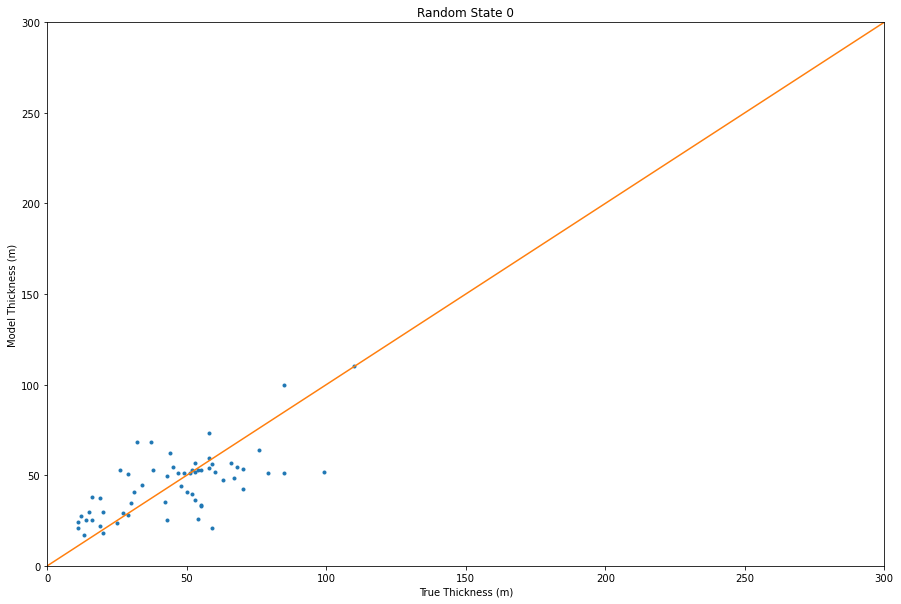

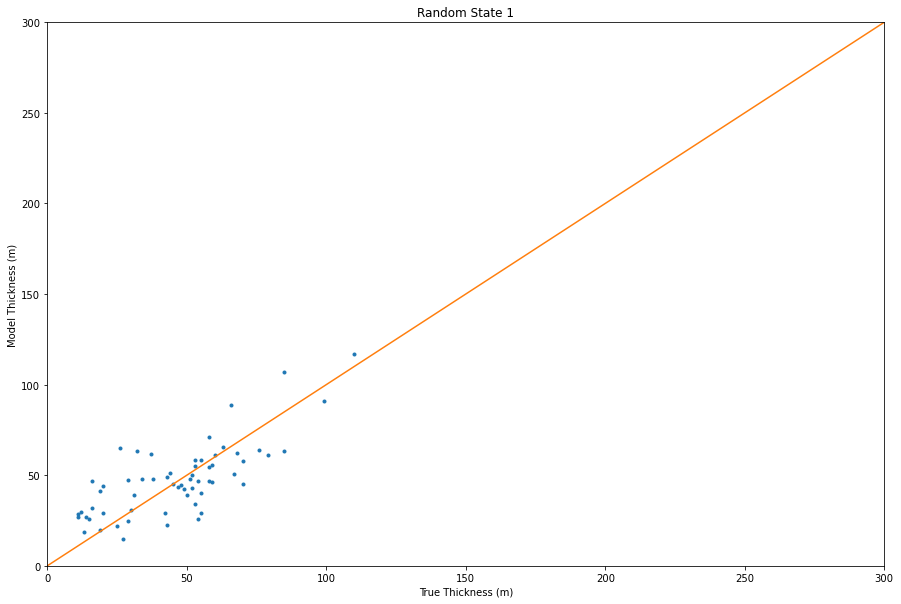

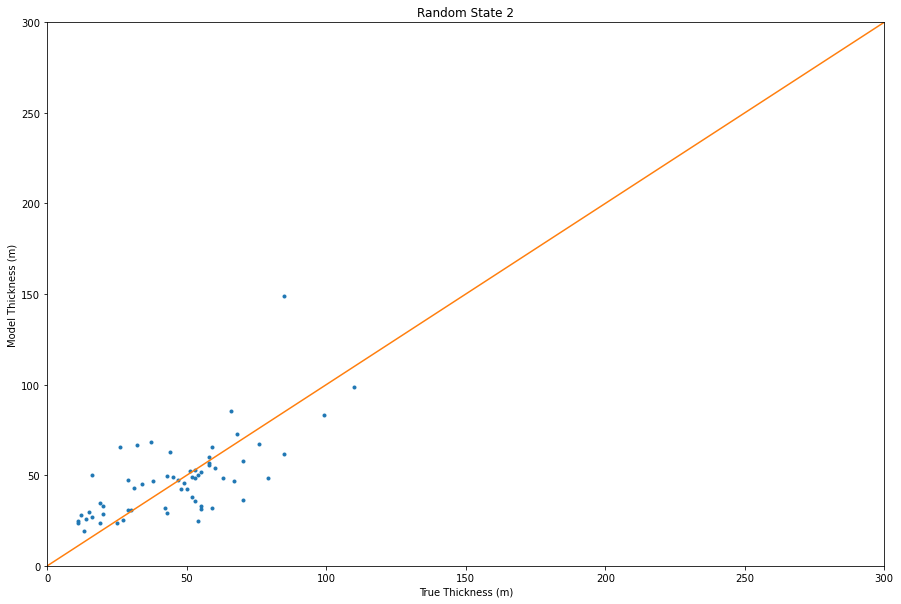

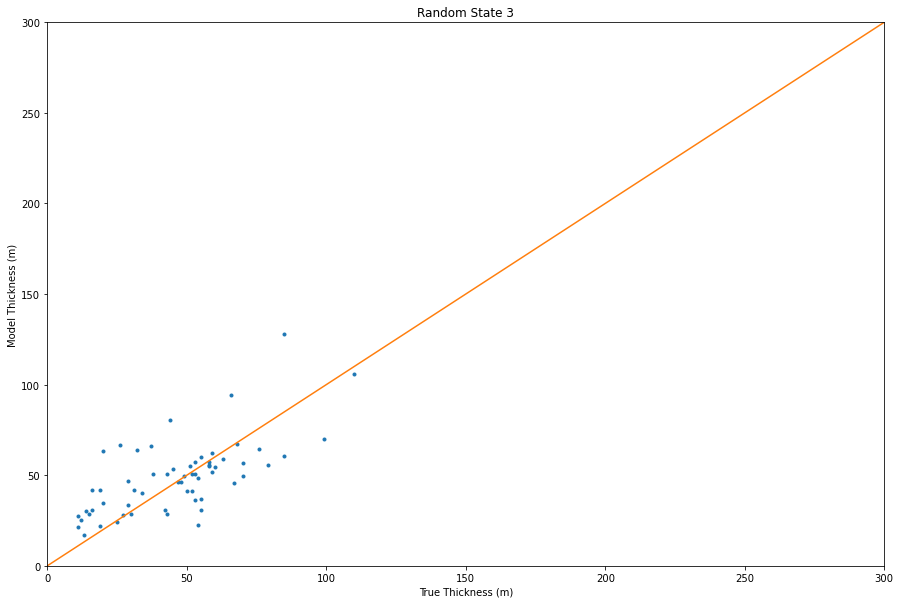

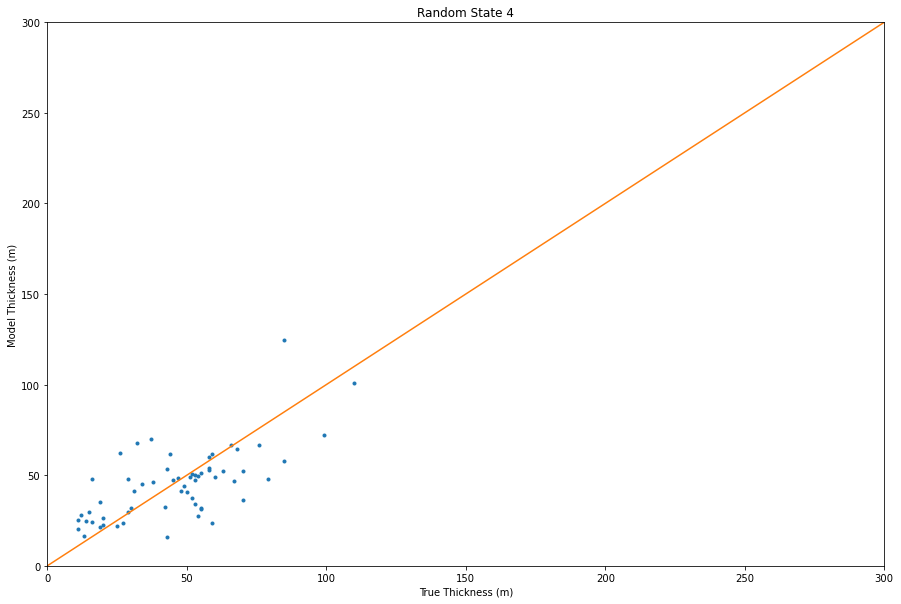

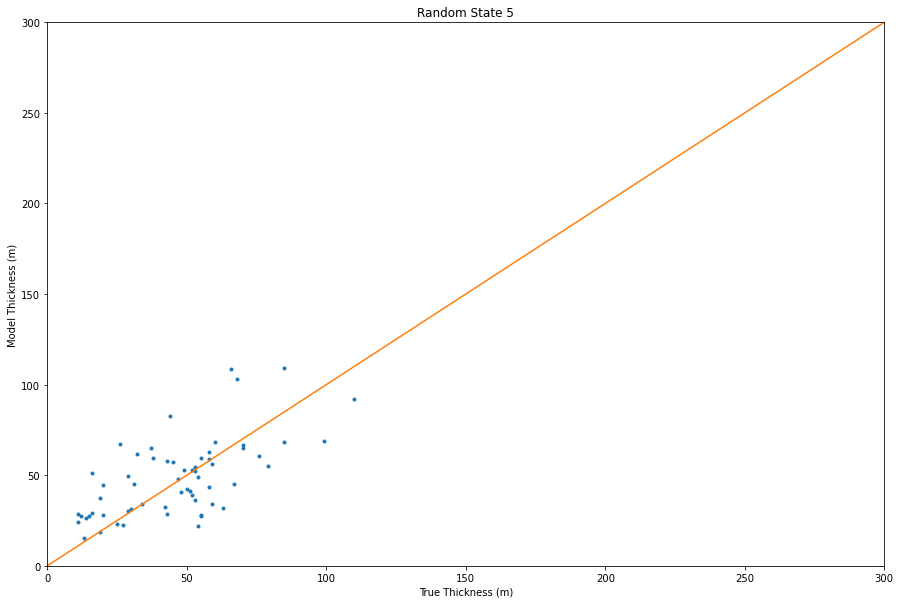

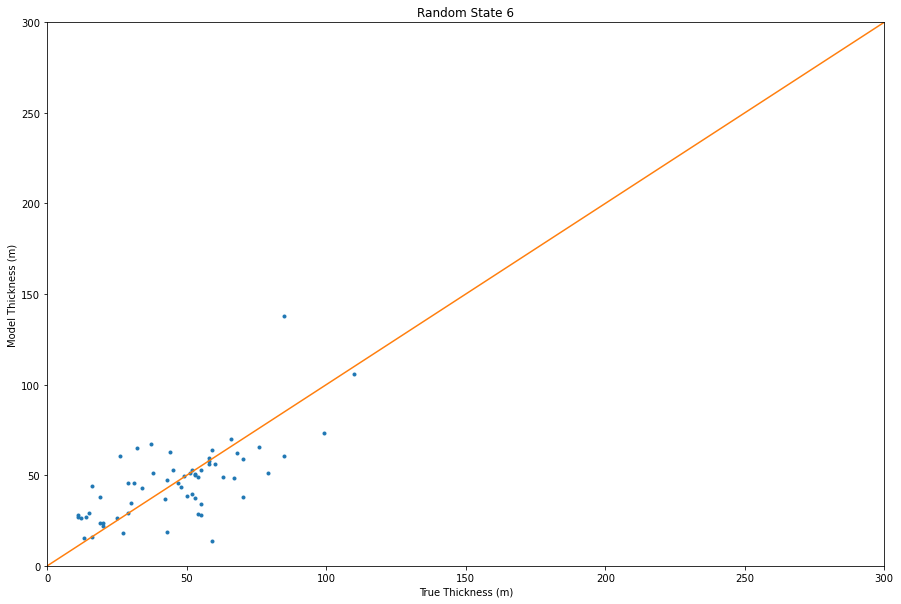

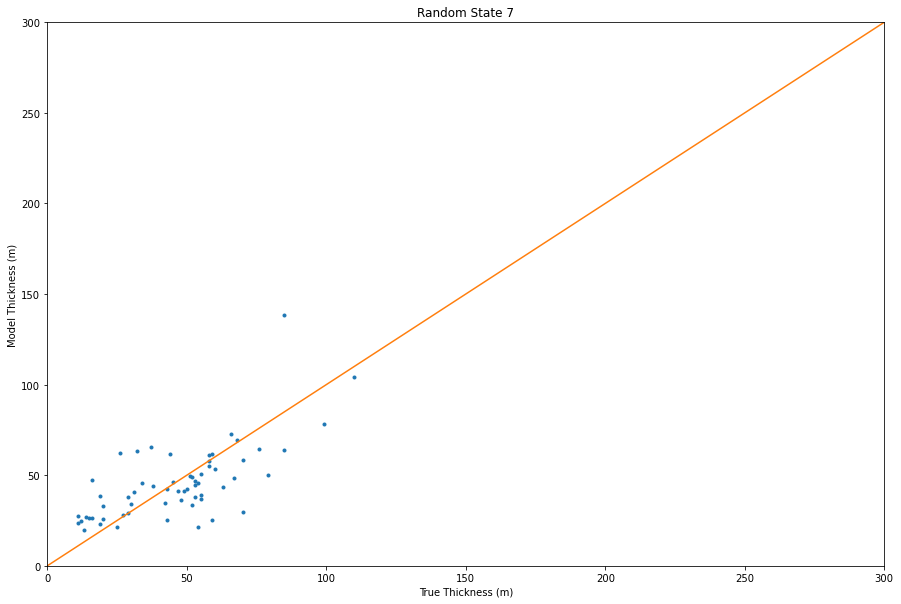

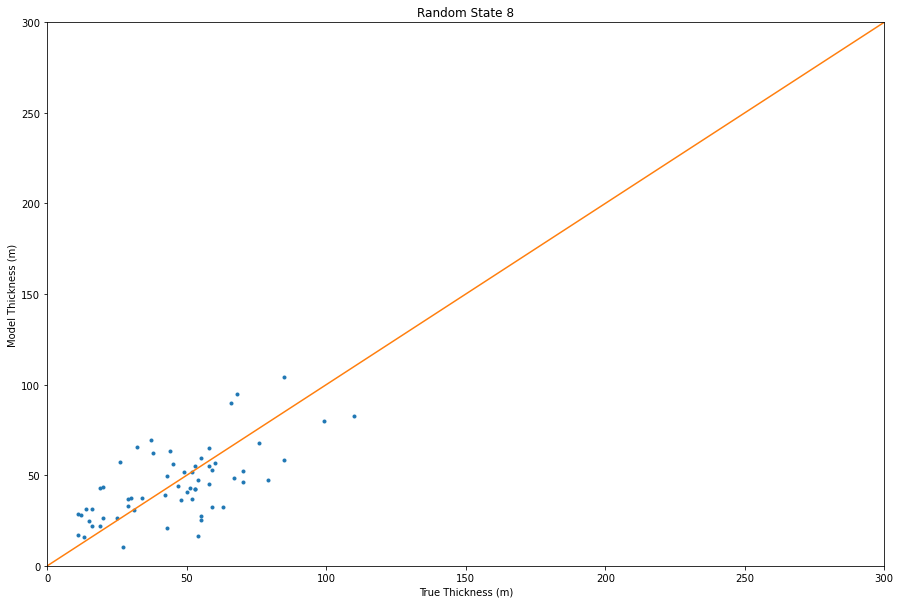

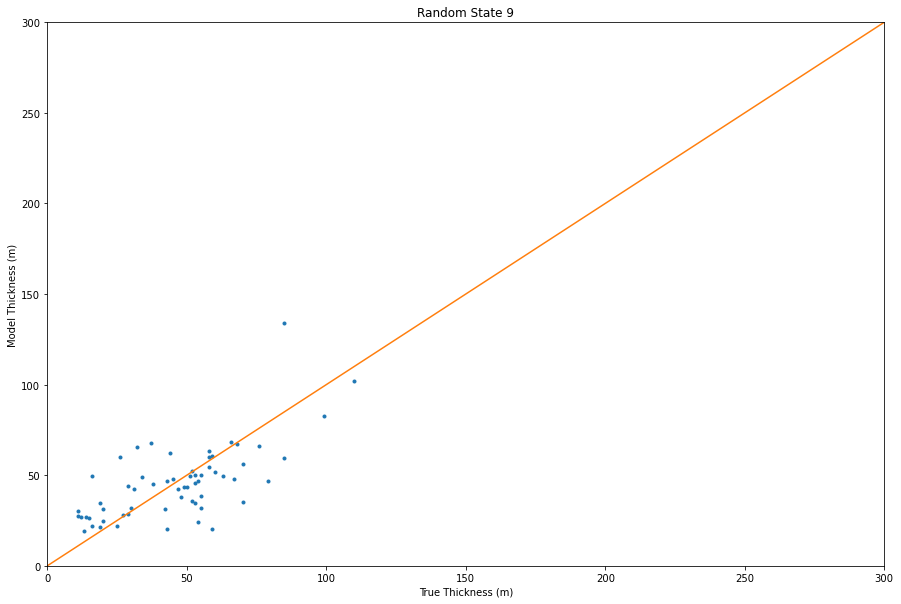

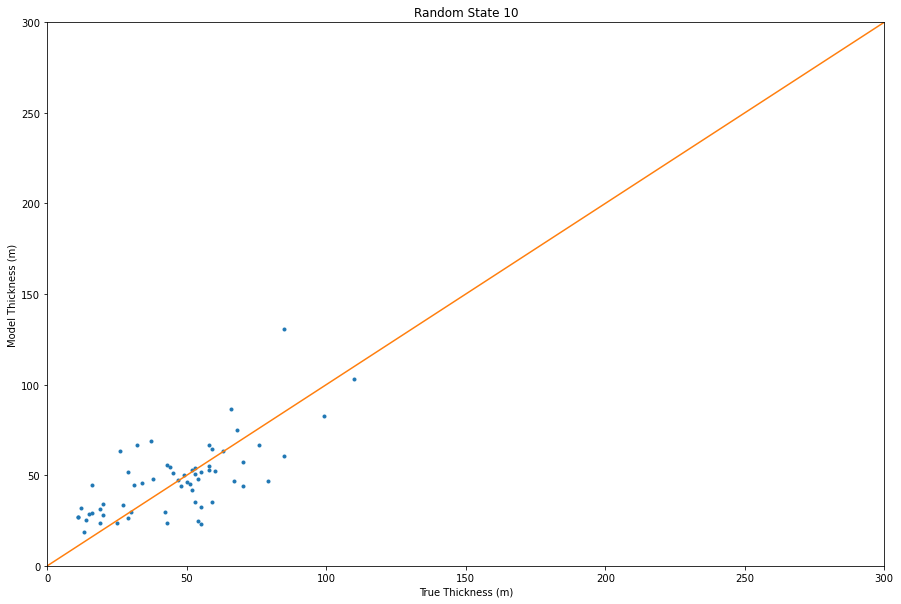

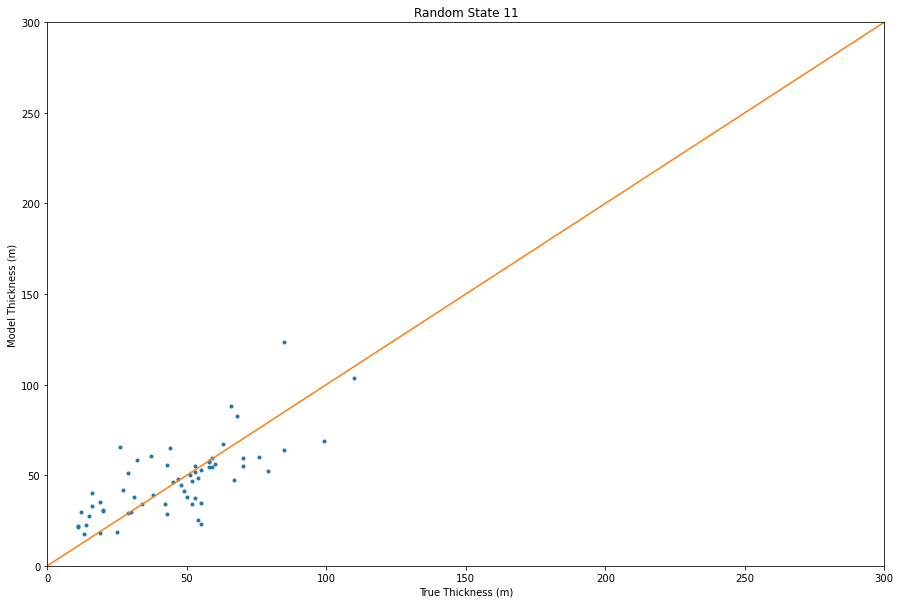

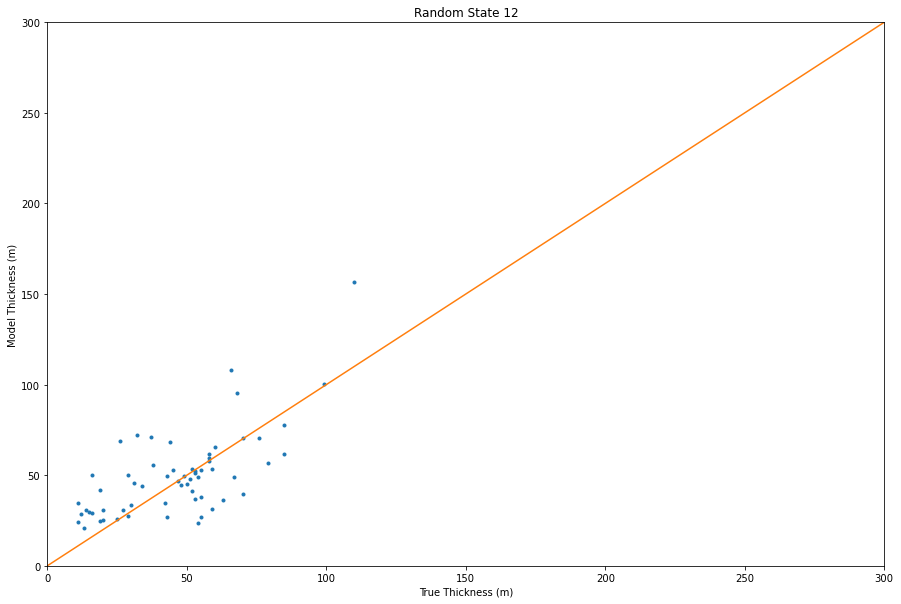

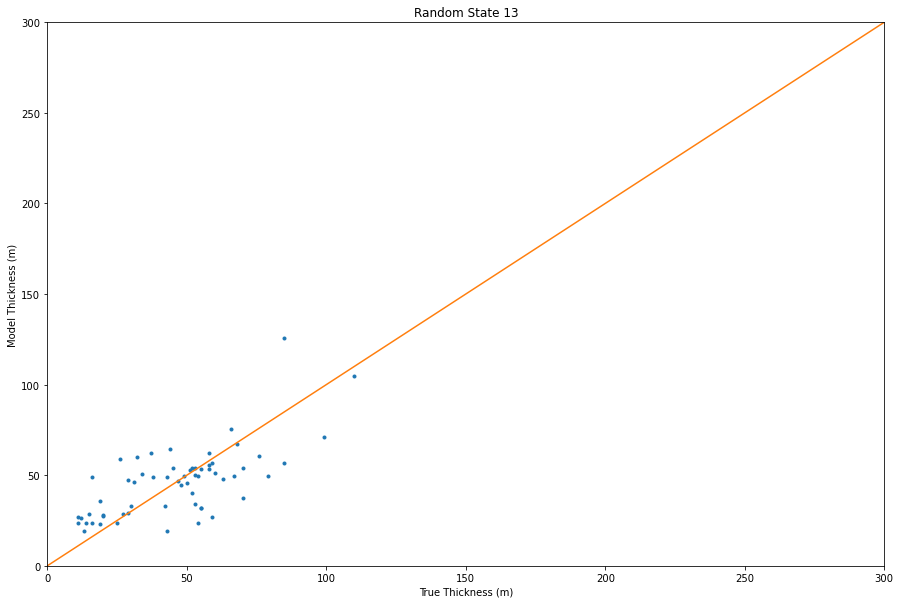

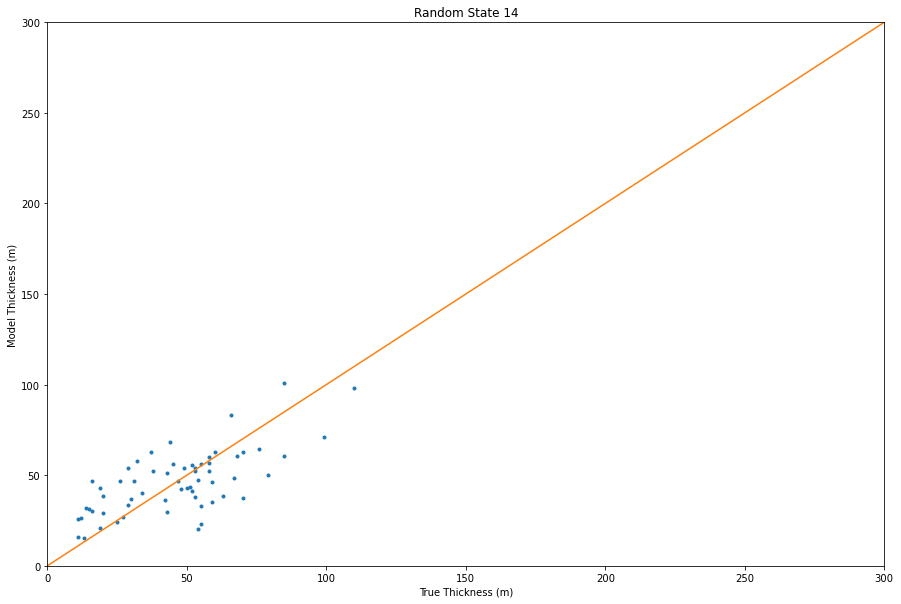

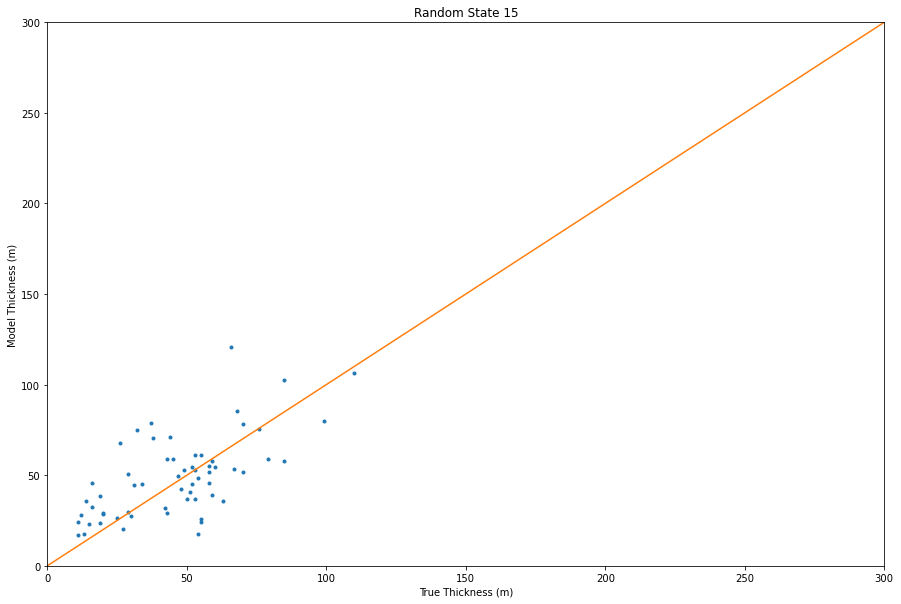

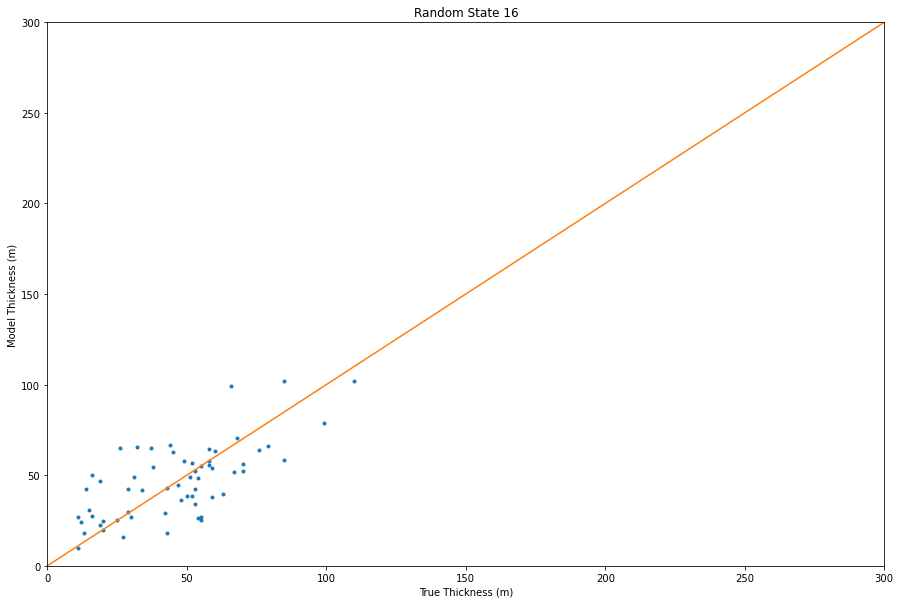

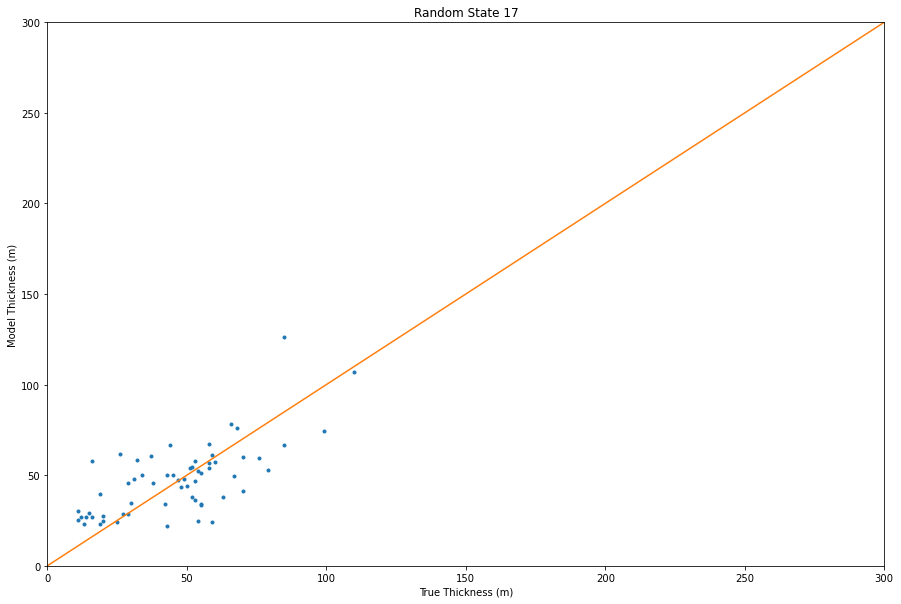

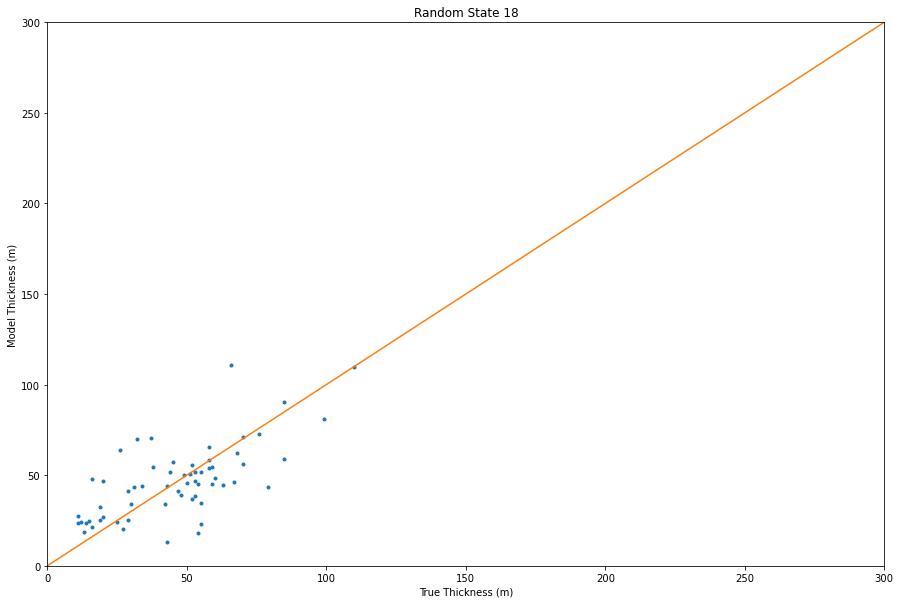

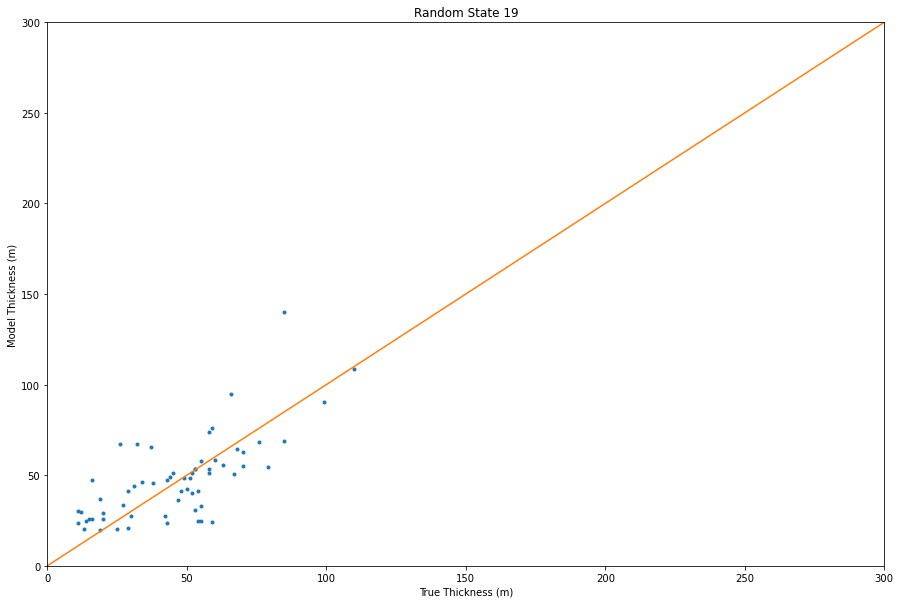

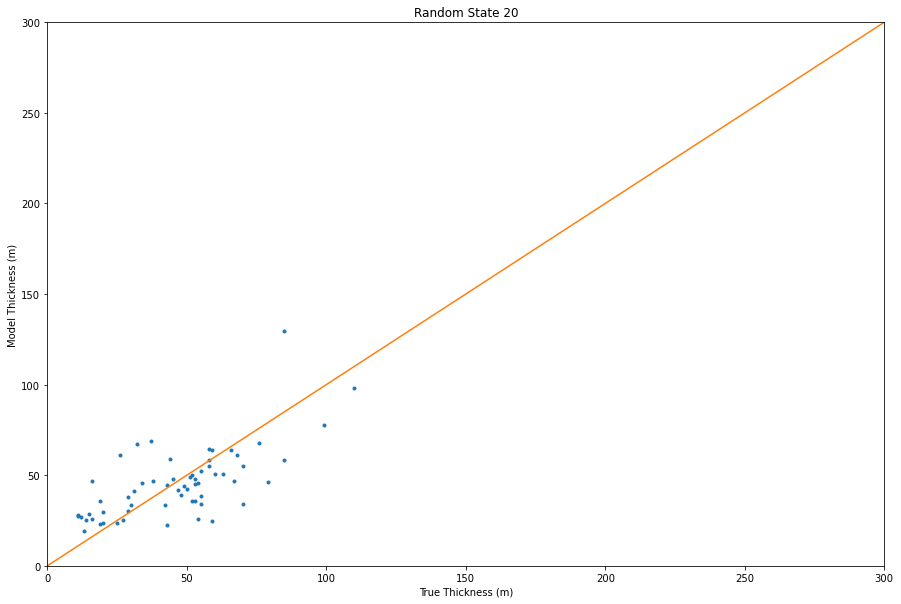

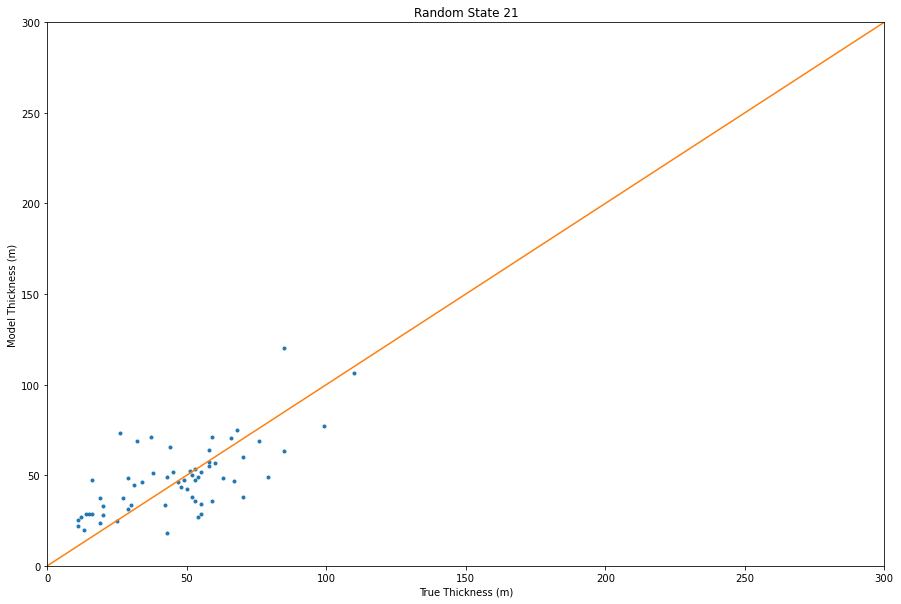

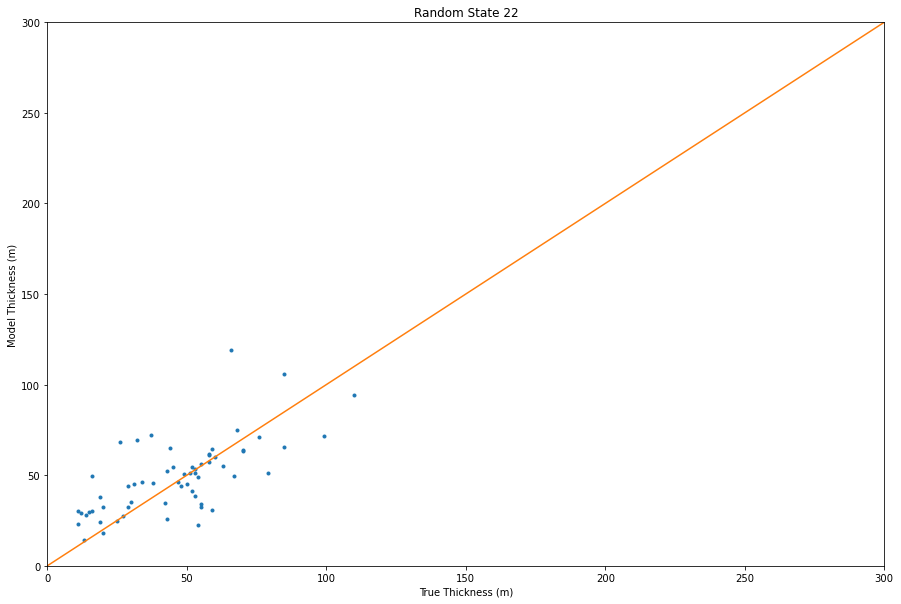

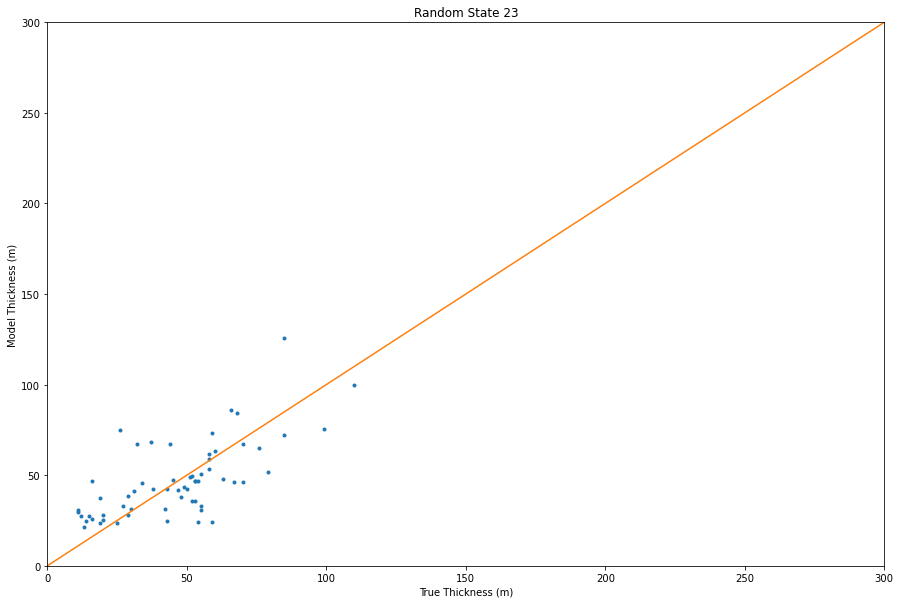

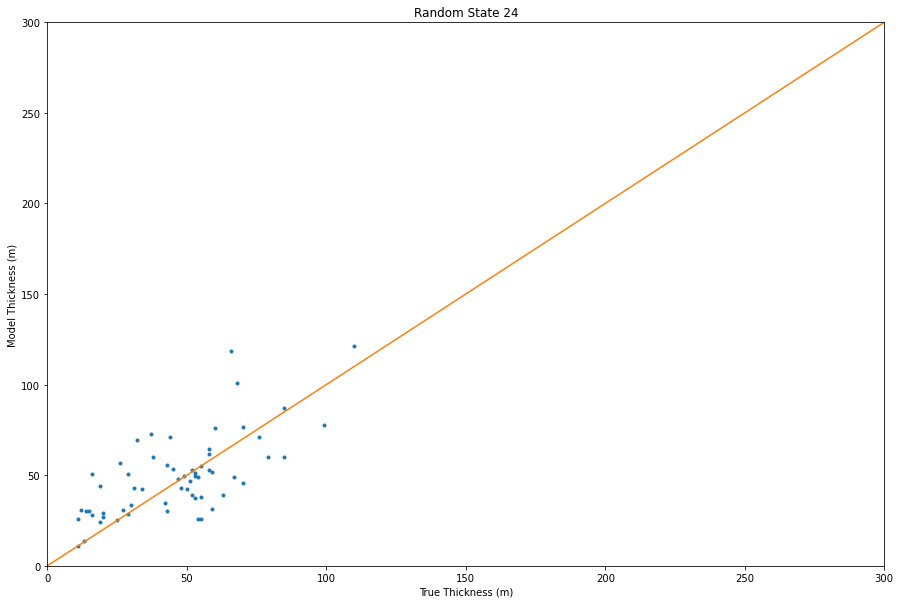

In [57]:
"""
This code plots predictions against actual thickness. Not currently modified and will load
EVERY SINGLE MODEL. DO NOT USE JUST YET
"""
for rs in RS:    
    y = dnn_model['10-5_Glam_dnn_MULTI_0.01_0.2_300_'+ str(rs)].predict(test_features, verbose=0)
    fig,ax=plt.subplots(1,1,figsize=(15,10))
    fig.patch.set_facecolor('w')
    plt.plot(test_labels,y,'.')
    plt.plot((0,300),(0,300),'-')
    plt.xlabel('True Thickness (m)')
    plt.ylabel('Model Thickness (m)')
    ax.set_title('Random State ' +str(rs))
    plt.xlim((0,300))
    plt.ylim((0,300))
    # plt.savefig("/home/sa42/notebooks/glac/figs/GTP_T")

In [7]:
ccccombo_breaker()
# past this point is under construction. 
# here be monsters

NameError: name 'ccccombo_breaker' is not defined

In [58]:
deviations

,layer architecture,model parameters,learning rate,validation split,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
10,10-5,168.0,0.01,0.2,17.670567,12.744849,0.679880,0.843327,1.090071,0.905652
2,16-8,306.0,0.001,0.2,18.308925,14.548954,0.218444,0.280178,0.384305,0.353112
4,12-6,210.0,0.01,0.2,18.319958,12.050961,0.851421,1.096475,1.206123,1.028272
1,16-8,306.0,0.01,0.2,18.322421,11.700051,1.103772,0.861498,1.318386,0.962624
5,12-6,210.0,0.001,0.2,18.609337,14.747237,0.317896,0.245189,0.451783,0.419643
14,8-4,130.0,0.001,0.2,19.018690,15.172641,0.454905,0.330150,0.543278,0.553481
13,8-4,130.0,0.01,0.2,19.246012,14.295843,3.809324,4.364966,6.337331,5.800722
9,10-5,168.0,0.1,0.2,19.761632,12.292652,1.246131,1.633289,2.115127,1.789434
11,10-5,168.0,0.001,0.2,19.901357,16.242461,5.787727,6.078379,7.712083,7.255176
12,8-4,130.0,0.1,0.2,20.047016,13.341808,2.385893,2.433213,3.162398,2.551610


In [67]:
# load all histories
print('Loading histories....')
rootdir = 'sr2/'
dnn_history = {}
arch = deviations['layer architecture'].iloc[[0]]
lr = deviations['learning rate'].iloc[[0]]
vs = deviations['validation split'].iloc[[0]]
print(arch)
print(lr)
print(vs)
# for arch in tqdm(os.listdir(rootdir)):
#     for folder in os.listdir(rootdir+arch):
#         if 'MULTI' in folder:
#             if 'dnn' in folder:

#                 dnn_history[arch[3:] + '_'+ folder] = pd.read_csv(rootdir+arch+'/'+folder)


"""
This cell plots each random state loss curve for the 25 random states for each run
Also loads EVERY SINGLE MODEL currently and blows up the memory. Working on it.
"""
# for rs in RS:
# for hist in dnn_history:    
#     print(hist)
#     fig,ax=plt.subplots(1,1,figsize=(10,10))
#     fig.patch.set_facecolor('w')
#     ax.set_title(hist)
#     gl.plot_loss(dnn_history[hist])
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP_dnn_loss.eps")

Loading histories....
10    10-5
Name: layer architecture, dtype: object
10    0.01
Name: learning rate, dtype: object
10    0.2
Name: validation split, dtype: float64


'\nThis cell plots each random state loss curve for the 25 random states for each run\nAlso loads EVERY SINGLE MODEL currently and blows up the memory. Working on it.\n'

NameError: name 'dnn_history' is not defined

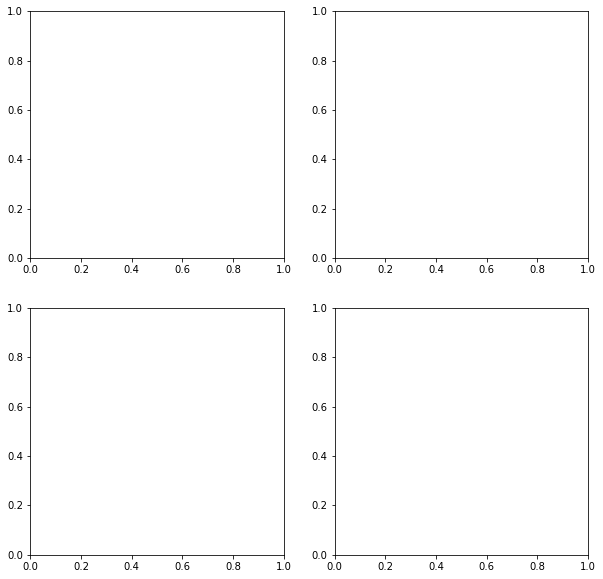

In [46]:
"""
This cell plots the different variable loss curves to show individual variable models
Not currently working because we have only loaded dnn_MULTI models
"""
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
# ax.set_ylim([5,30])

# gl.plot_loss(dnn_history['T_MULTI'])
for i, variable_name in enumerate(list(train_features)):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(dnn_history['glacier_'+ variable_name+ '_0.1_0.2_300_6'])
#     ax.set_ylim([35,140])
    ax.set_title(variable_name)
    plt.tight_layout()
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")


In [30]:
"""
Here we compute the average thickness for each RGI glacier
"""
RGI['avg predicted thickness'] = 'NaN'
for i in tqdm(dfs.index):
    avg_predicted_thickness = np.sum(dfs.loc[i])/len(dfs.loc[i])
#     print(i)
#     print(np.sum(dfs.loc[i])/len(dfs.loc[i]))
#     print('')
#     break
    RGI['avg predicted thickness'].loc[i] = avg_predicted_thickness

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
  0%|          | 0/216501 [00:00<?, ?it/s]/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
  3%|▎         | 7187/216501 [00:07<03:49, 910.27it/s]


KeyboardInterrupt: 

In [ ]:
predictions = predictions.rename(columns = {'architecture':'layer architecture'})

In [45]:
dfs = pd.DataFrame()
for rs in RS:
    print(rs)
    df = deviations.iloc[:1]
    s = pd.Series(dnn_model['10-5_Glam_dnn_MULTI_0.01_0.2_300_'+str(rs)].predict(RGI).flatten(), name = rs)
    dfs[rs] = s
#     break
#     dfs = dfs.assign(str(s))
print(s)
dfs


0


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
for model in predictions[(predictions['learning rate'] == df['learning rate']) and (predictions['layer architecture'] == df['layer architecture'])]:
    fig,ax = plt.subplots()
    ax.set_title('Layer architecture: ' + architecture)
    ax.set_ylabel('prediction count')
    ax.set_xlabel('thickness (m)')
    fig.patch.set_facecolor('w')
    plt.hist(df['avg test thickness'])
# print(df)

In [ ]:
for model in predictions['model']:
    print(model)

In [ ]:
# predictions['layer architecture']
# df['layer architecture']
# predictions['learning rate']
# df['learning rate']

In [ ]:
if predictions['layer architecture'].values() == [str(0.1)]:
    print(ding)

In [ ]:
# predictions['layer architecture']
# predictions[(predictions['learning rate'] == df['learning rate']) and (predictions['layer architecture'] == df['layer architecture'])]:
for architecture in predictions['layer architecture']:
#     if predictions['layer architecture'] == df['layer architecture'] and predictions['learning rate'] == df['learning rate']:
    print('')
    print(architecture)

In [51]:
deviations = deviations.sort_values('test mae avg')
deviations

,layer architecture,model parameters,learning rate,validation split,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
10,10-5,168.0,0.01,0.2,17.670567,12.744849,0.679880,0.843327,1.090071,0.905652
2,16-8,306.0,0.001,0.2,18.308925,14.548954,0.218444,0.280178,0.384305,0.353112
4,12-6,210.0,0.01,0.2,18.319958,12.050961,0.851421,1.096475,1.206123,1.028272
1,16-8,306.0,0.01,0.2,18.322421,11.700051,1.103772,0.861498,1.318386,0.962624
5,12-6,210.0,0.001,0.2,18.609337,14.747237,0.317896,0.245189,0.451783,0.419643
14,8-4,130.0,0.001,0.2,19.018690,15.172641,0.454905,0.330150,0.543278,0.553481
13,8-4,130.0,0.01,0.2,19.246012,14.295843,3.809324,4.364966,6.337331,5.800722
9,10-5,168.0,0.1,0.2,19.761632,12.292652,1.246131,1.633289,2.115127,1.789434
11,10-5,168.0,0.001,0.2,19.901357,16.242461,5.787727,6.078379,7.712083,7.255176
12,8-4,130.0,0.1,0.2,20.047016,13.341808,2.385893,2.433213,3.162398,2.551610


/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


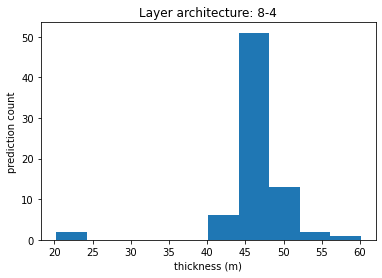

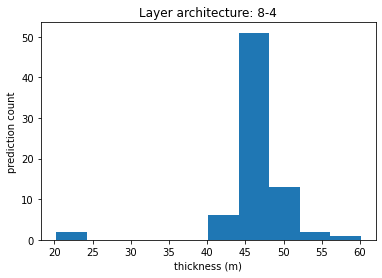

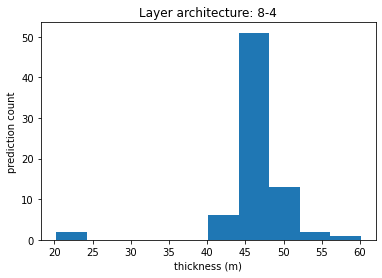

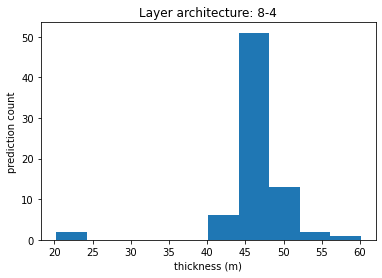

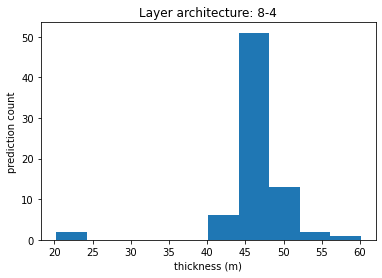

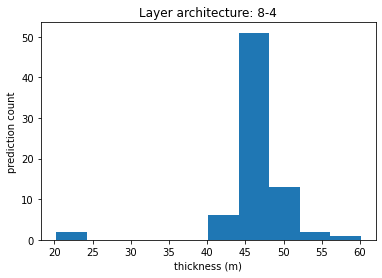

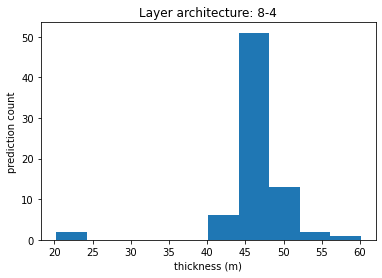

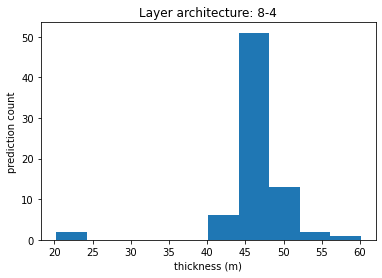

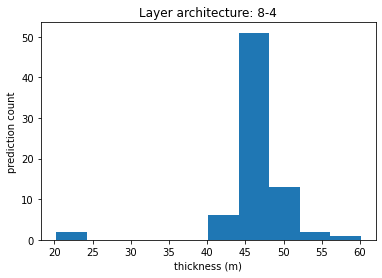

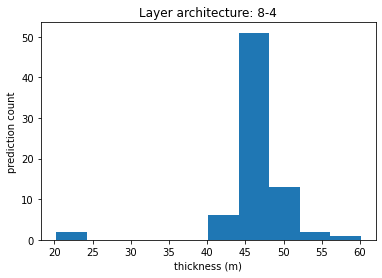

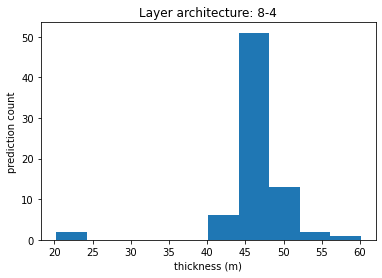

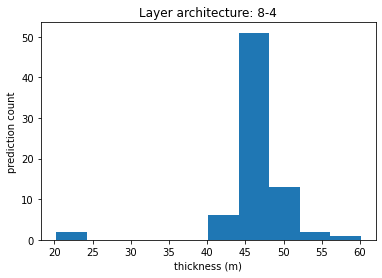

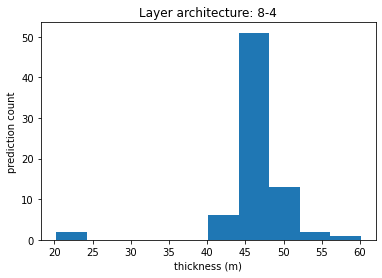

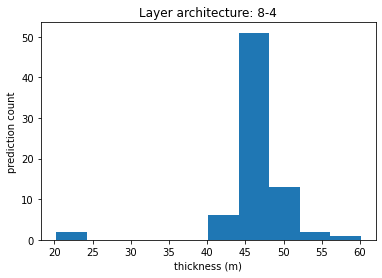

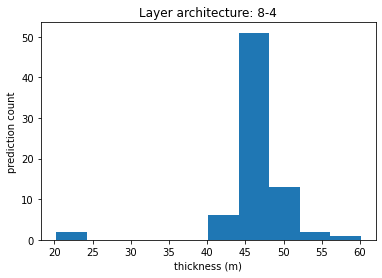

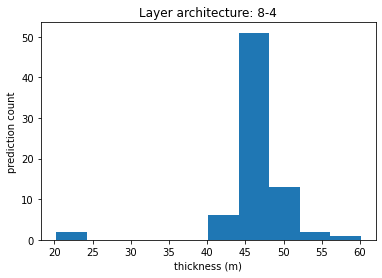

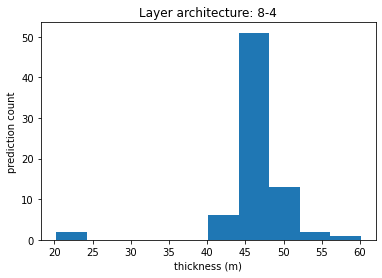

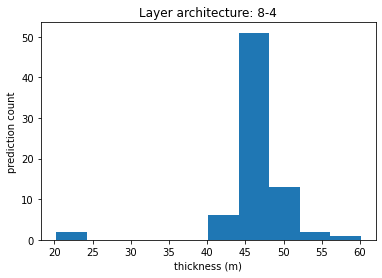

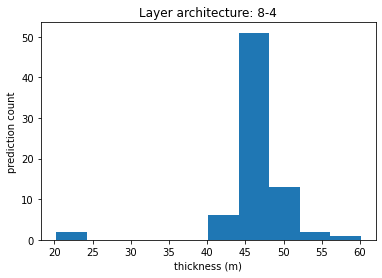

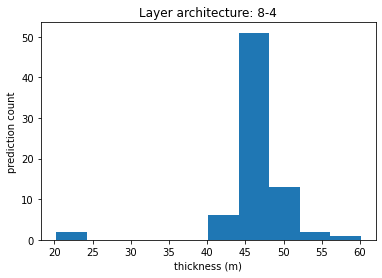

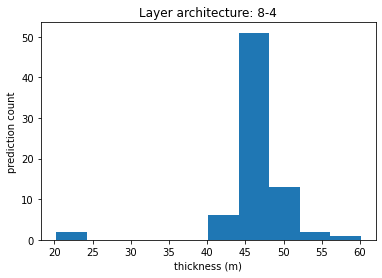

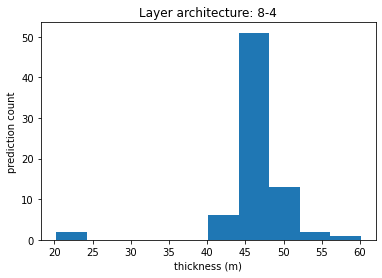

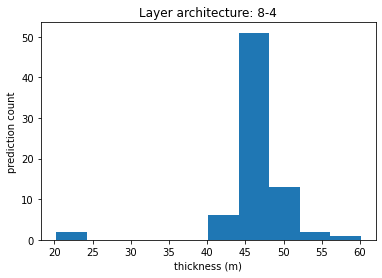

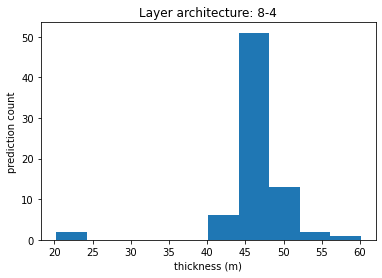

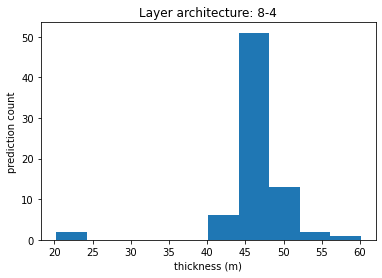

In [52]:
"""
This cell contains code to produce histograms of all the architectures different histories
"""


df = deviations.iloc[:1]


for rs in RS:
    df = predictions[predictions['architecture'] == architecture]
    fig,ax = plt.subplots()
    ax.set_title('Layer architecture: ' + architecture)
    ax.set_ylabel('prediction count')
    ax.set_xlabel('thickness (m)')
    fig.patch.set_facecolor('w')
    plt.hist(df['avg test thickness'])
# print(df)

In [ ]:
# """
# This cell contains code to produce histograms of all the architectures different histories
# """

# for architecture in list(predictions['architecture'].unique()):
#     df = predictions[predictions['architecture'] == architecture]
#     fig,ax = plt.subplots()
#     ax.set_title('Layer architecture: ' + architecture)
#     ax.set_ylabel('prediction count')
#     ax.set_xlabel('thickness (m)')
#     fig.patch.set_facecolor('w')
#     plt.hist(df['avg test thickness'])
# # print(df)

In [ ]:
"""
This cell plots each random state loss curve for the 25 random states for each run
Also loads EVERY SINGLE MODEL currently and blows up the memory. Working on it.
"""
# for rs in RS:
for hist in dnn_history:    
    fig,ax=plt.subplots(1,1,figsize=(10,10))
    fig.patch.set_facecolor('w')
    ax.set_title(hist)
    gl.plot_loss(dnn_history[hist])
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP_dnn_loss.eps")

In [ ]:
# for modl in dnn_modl:    
#     y = dnn_modl[modl].predict(test_features)
#     fig,ax=plt.subplots(1,1,figsize=(15,10))
#     fig.patch.set_facecolor('w')
#     plt.plot(test_labels,y,'.')
#     plt.plot((0,300),(0,300),'-')
#     plt.xlabel('True Thickness (m)')
#     plt.ylabel('Model Thickness (m)')
#     plt.xlim((0,300))
#     plt.ylim((0,300))
#     # plt.savefig("/home/sa42/notebooks/glac/figs/GTP_T")

In [53]:
# load all histories
print('Loading histories....')
rootdir = 'sr2/'
dnn_history = {}
for arch in tqdm(os.listdir(rootdir)):
    for folder in os.listdir(rootdir+arch):
        if 'MULTI' in folder:
            if 'dnn' in folder:

                dnn_history[arch[3:] + '_'+ folder] = pd.read_csv(rootdir+arch+'/'+folder)
# dnn_history

Loading histories....


100%|██████████| 5/5 [00:00<00:00, 16.22it/s]


In [54]:
dnn_history

{'16-8_Glam_dnn_history_MULTI_0.1_0.2_300_0':      Unnamed: 0       loss   val_loss
 0             0  44.325676  33.078037
 1             1  30.439671  18.441181
 2             2  18.809122  18.718985
 3             3  18.530672  18.954927
 4             4  18.278111  15.418401
 ..          ...        ...        ...
 295         295   9.015618  13.733062
 296         296   9.246454  13.546689
 297         297   9.619381  12.323277
 298         298   9.841233  14.332429
 299         299   9.637546  14.274206
 
 [300 rows x 3 columns],
 '16-8_Glam_dnn_history_MULTI_0.1_0.2_300_1':      Unnamed: 0       loss   val_loss
 0             0  43.924091  28.952120
 1             1  27.057760  18.698536
 2             2  19.080999  18.689249
 3             3  18.248798  14.790394
 4             4  18.055893  19.705111
 ..          ...        ...        ...
 295         295  11.808011  15.108289
 296         296  11.814607  16.748405
 297         297  11.922072  15.280137
 298         298  11.2851

In [31]:
dnn_model

{'16-8_Glam_dnn_MULTI_0.1_0.2_300_0': <keras.engine.sequential.Sequential at 0x7fd0f226ed90>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_1': <keras.engine.sequential.Sequential at 0x7fd0e4583b50>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_2': <keras.engine.sequential.Sequential at 0x7fd0d8498a10>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_3': <keras.engine.sequential.Sequential at 0x7fd0e4510210>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_4': <keras.engine.sequential.Sequential at 0x7fd0d8271f50>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_5': <keras.engine.sequential.Sequential at 0x7fd0d0530a10>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_6': <keras.engine.sequential.Sequential at 0x7fd0d0363fd0>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_7': <keras.engine.sequential.Sequential at 0x7fd0d8070690>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_8': <keras.engine.sequential.Sequential at 0x7fd0d06e1250>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_9': <keras.engine.sequential.Sequential at 0x7fd0801b8f90>,
 '16-8_Glam_dnn_MULTI_0.1_0.2_300_10': <keras.engine.sequent

In [ ]:
"""
This is a density plot of the most recent predictions made. Can easily be modified in a loop
to show multiple random states and whatnot
"""
sns.set(rc={"figure.figsize":(15,10)})
sns.kdeplot(x = test_labels, y = y.flatten(),fill = True)
plt.plot((0,300),(0,300),'-')

In [ ]:
deviations.sort_values('test mae avg')


In [ ]:
dnn_history

In [ ]:
qqq.iloc[0]

In [ ]:
# # load all histories
# qqq = deviations.sort_values('test mae avg')


for rs in RS:
#     dnn_histor+y[qqq['layer architecture']+
#                 'Glam_dnn_history_MULTI_'+
#                 qqq['learning rate']+
#                 '_0.2_300_'+
#                 rs]
    gl.plot_loss(dnn_history[qqq['layer architecture'].iloc[0]+
                '_Glam_dnn_history_MULTI_'+
                qqq['learning rate'].iloc[0]+
                '_0.2_300_'+
                str(rs)])
# print('Loading histories....')
# rootdir = 'sr2/'
# dnn_history = {}
# for arch in tqdm(os.listdir(rootdir)):
#     for folder in os.listdir(rootdir+arch):
#         if 'MULTI' in folder and 'dnn' in folder:

#             dnn_history[arch[3:] + '_'+ folder] = pd.read_csv(rootdir+arch+'/'+folder)
# dnn_history

In [ ]:

[qqq['layer architecture'].iloc[0]+
                    '_Glam_dnn_history_MULTI_'+
                    qqq['learning rate'].iloc[0]+
                    '_0.2_300_'+
                    str(rs)]

In [ ]:
# def plot_single_variable(x,y,model_type,model_name,feature_name):
#     y = model_type[model_name].predict(test_labels)
#     plt.scatter(train_features[feature_name], train_labels, label='Data')
#     plt.plot(x, y,'.', color='k', label='Predictions')
#     plt.xlabel(feature_name)
#     plt.ylabel('THICKNESS')
#     plt.legend()
#     plt.plot()

# x = test_labels
# for i, variable_name in enumerate(list(train_features)):
#     ax = plt.subplot(2,2,i+1)
#     model_name = (dataset.name 
#     + '_' 
#     + variable_name 
#     + '_' 
#     + str(lr) 
#     + '_' 
#     + str(vs) 
#     + '_' 
#     + str(ep))
#     plot_single_variable(x,y,dnn_model, model_name,variable_name)
# #     ax.set_ylim([35,140])
# #     ax.set_title(variable_name)
# #     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
# plt.tight_layout()

In [ ]:
# """
# This cell contains code to load models and histories.
# """

# # fix hyperparameters 
# lr = 0.1
# vs = 0.2
# # load models
# print('Loading models....')

# linear_model = {}
# dnn_model = {}
# # data is already split, however if other databases are used, then this line is needed
# # (train_features, test_features, train_labels, test_labels) = gl.data_splitter(glacier)
# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#         pth_mod 
#         + 'glacier' 
#         + '_linear_' 
#         + variable_name 
#         + '_' 
#         + str(lr)
#         + '_'
#         + str(vs)
#         + '_'
#         + str(ep)
#         + '_'
#         + str(rs)
#         )

#         linear_model[
#             'glacier' 
#             + '_' 
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ] = tf.keras.models.load_model(file_name)
        
# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#         pth_mod 
#         + 'glacier' 
#         + '_dnn_' 
#         + variable_name 
#         + '_' 
#         + str(lr)
#         + '_'
#         + str(vs)
#         + '_'
#         + str(ep)
#         + '_'
#         + str(rs)
#         )

#         dnn_model[
#             'glacier'
#             + '_' 
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ] = tf.keras.models.load_model(file_name)
# print('Models loaded')

# # load all histories
# print('Loading histories....')
# linear_history = {}
# dnn_history = {}
# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#             pth_res 
#             + 'glacier' 
#             +'_linear_history_'
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         )

#         linear_history[
#             'glacier' 
#             +'_'
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ]= pd.read_csv(file_name)

# for variable_name in tqdm(list(train_features) + ['MULTI']):
#     for rs in RS:
#         file_name = (
#             pth_res 
#             + 'glacier_dnn_history_' 
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         )

#         dnn_history[
#             'glacier' 
#             +'_'
#             + variable_name 
#             + '_' 
#             + str(lr)
#             + '_'
#             + str(vs)
#             + '_'
#             + str(ep)
#             + '_'
#             + str(rs)
#         ] = pd.read_csv(file_name)
# print('Histories loaded')

In [ ]:

"""
This cell loads the loss histories from the original model with one dense layer of 64 nodes.
From these histories I extracted the lowest and final loss value and plotted them.
First is plotted the loss from using different learning rates with a fixed validation split. 
Then follows a plot of different validation splits using a fixed learning rate.
"""

# set up dictionaries
loss = {}
dnn_lr_history = {}
loss['glacier_min_learn'] = pd.DataFrame()
loss['glacier_fin_learn'] = pd.DataFrame()

# loop to define and then load histories
for lr in LR:
    file_name = (
    'sr/sr_64/'
    + 'glacier_dnn_history_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    file = (
    'glacier_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    
    
    dnn_lr_history[
    'glacier_MULTI_' 
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep)
    ] = pd.read_csv(file_name)
    
    # find minimum and insert other model hyperparameters into table
    m_loss = dnn_lr_history[file].min()
    m_loss['learning rate'] = str(lr)
    m_loss['validation split'] = str(vs)
    m_loss['epochs'] = str(ep)
    loss['glacier_min_learn'] = loss['glacier_min_learn'].append(m_loss,ignore_index=True)
    
    
    # find final and insert other model hyperparameters into table
    f = dnn_lr_history[file].last_valid_index()
    f_loss = dnn_lr_history[file].iloc[[f]]
    f_loss['learning rate'] = str(lr)
    f_loss['validation split'] = str(vs)
    f_loss['epochs'] = str(ep)

    loss['glacier_fin_learn'] = loss['glacier_fin_learn'].append(f_loss,ignore_index=True)

loss['glacier_fin_learn'] = loss['glacier_fin_learn'].rename(columns = {
    'loss':'loss_final',
    'val_loss':'val_loss_final'
})

loss['glacier_min_learn'] = loss['glacier_min_learn'].rename(columns = {
    'loss':'loss_minimum',
    'val_loss':'val_loss_minimum'
})
    
print('Results compiled')
sns.set(rc={"figure.figsize":(15,10)})
ax = plt.gca()
ax.set_ylim([5,30])
# loss['glacier_min'].plot(x='validation split', y = ['loss_minimum', 'val_loss_minimum'], kind='bar',  ax=ax)
# loss['glacier_fin'].plot(x='validation split', y = ['loss_final', 'val_loss_final'], kind='bar',  ax=ax)

loss['glacier_fin_learn'].plot(x='learning rate', y = 'loss_final',color = 'blue',  ax=ax)
loss['glacier_fin_learn'].plot(x='learning rate', y = 'val_loss_final',color = 'green', ax=ax)
loss['glacier_min_learn'].plot(x='learning rate', y = 'loss_minimum', color = 'red', ax=ax)
loss['glacier_min_learn'].plot(x='learning rate', y = 'val_loss_minimum',color = 'orange', ax=ax)
ax.set_xlabel('Learning rate at fixed validation split = 0.2')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('GlaThiDa Glacier scale dataset multivariable regression hyperparameterization')
plt.show()
plt.tight_layout()



# repeat above loop with fixed lr and varied vs
lr = 0.1
loss = {}
dnn_vs_history = {}
loss['glacier_min_valsplit'] = pd.DataFrame()
loss['glacier_fin_valsplit'] = pd.DataFrame()
for vs in VS:
    file_name = (
    'sr/sr_64/'
    + 'glacier_dnn_history_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    file = (
    'glacier_MULTI_'
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep))
    
    
    
    dnn_lr_history[
    'glacier_MULTI_' 
    + str(lr)
    + '_'
    + str(vs)
    + '_'
    + str(ep)
    ] = pd.read_csv(file_name)
    
    
    m_loss = dnn_lr_history[file].min()
    m_loss['learning rate'] = str(lr)
    m_loss['validation split'] = str(vs)
    m_loss['epochs'] = str(ep)
    loss['glacier_min_valsplit'] = loss['glacier_min_valsplit'].append(m_loss,ignore_index=True)

    f = dnn_lr_history[file].last_valid_index()
    f_loss = dnn_lr_history[file].iloc[[f]]
    f_loss['learning rate'] = str(lr)
    f_loss['validation split'] = str(vs)
    f_loss['epochs'] = str(ep)

    loss['glacier_fin_valsplit'] = loss['glacier_fin_valsplit'].append(f_loss,ignore_index=True)

loss['glacier_fin_valsplit'] = loss['glacier_fin_valsplit'].rename(columns = {
    'loss':'loss_final',
    'val_loss':'val_loss_final'
})

loss['glacier_min_valsplit'] = loss['glacier_min_valsplit'].rename(columns = {
    'loss':'loss_minimum',
    'val_loss':'val_loss_minimum'
})
    
print('Results compiled')
sns.set(rc={"figure.figsize":(15,10)})
ax = plt.gca()
ax.set_ylim([5,30])
# loss['glacier_min'].plot(x='validation split', y = ['loss_minimum', 'val_loss_minimum'], kind='bar',  ax=ax)
# loss['glacier_fin'].plot(x='validation split', y = ['loss_final', 'val_loss_final'], kind='bar',  ax=ax)

loss['glacier_fin_valsplit'].plot(x='validation split', y = 'loss_final',color = 'blue',  ax=ax)
loss['glacier_fin_valsplit'].plot(x='validation split', y = 'val_loss_final',color = 'green', ax=ax)
loss['glacier_min_valsplit'].plot(x='validation split', y = 'loss_minimum', color = 'red', ax=ax)
loss['glacier_min_valsplit'].plot(x='validation split', y = 'val_loss_minimum',color = 'orange', ax=ax)
ax.set_xlabel('Validation splits with learning rate = 0.1')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('GlaThiDa Glacier scale dataset multivariable regression hyperparameterization')
plt.show()
plt.tight_layout()

In [ ]:
"""
This cell computes the true average thickness of the glaciers in use
"""


pth = '/data/fast1/glacierml/T_models/'
T_lab = pd.read_csv(pth + 'T.csv', low_memory = False)
T_lab = T_lab[[
    'GlaThiDa_ID',
    'LAT',
    'LON',
    'AREA',
    'MEAN_SLOPE',
    'MEAN_THICKNESS'
]]
T_lab = T_lab.dropna()

tru_thickness = np.sum(T_lab['MEAN_THICKNESS']) / len(T_lab['MEAN_THICKNESS'])
tru_thickness

In [68]:
# set definitions
glacier = gl.data_loader(pth = '/data/fast1/glacierml/T_models/')
# ,TT,TTT,TTTx,TTT_full
# T_t = T.head()

# rename thickness column in database
gl.thickness_renamer(glacier)

# split data for training and validation
(train_features, test_features, train_labels, test_labels) = gl.data_splitter(glacier)

# define model hyperparameters
LR = np.logspace(-3,2,6)
vs = 0.2
VS = 0.1,0.15,0.2,0.25,0.3,0.35,0.4
RS = range(0,25,1)
ep = 300

# name databases
glacier.name = 'glacier'
# T_t.name = 'T_t'
# TT.name = 'band'
# TTT.name = 'point'
# TTTx.name = 'TTTx'
# TTT_full.name = 'TTT_full'

# old definitions, legacy code.

# arch = '16-8'
# pth_mod = 'sm/sm_' + arch + '/'
# pth_res = 'sr/sr_' + arch + '/'

"""
Here we evaluate models and make predictions, then display the zults
"""
rootdir = 'sm/'
# print(rootdir)
dnn_model = {}
predictions = pd.DataFrame()
for arch in tqdm(os.listdir(rootdir)):
    for folder in os.listdir(rootdir+arch):
        if 'MULTI' in folder and 'dnn' in folder:
            
            if '0.1' in folder:
                dnn_model[arch[3:]+'_'+folder] = tf.keras.models.load_model(rootdir 
                    + arch 
                    + '/' 
                    + folder)

                mae_test = dnn_model[arch[3:]+'_'+folder].evaluate(test_features,
                                                             test_labels,verbose=0)

                mae_train = dnn_model[arch[3:]+'_'+folder].evaluate(train_features,
                                             train_labels,verbose=0)

                pred_train = dnn_model[arch[3:]+'_'+folder].predict(train_features,verbose=0)

                pred_test = dnn_model[arch[3:]+'_'+folder].predict(test_features,verbose=0)
                avg_thickness = pd.Series((np.sum(pred_train) / len(pred_train)), name = 'avg train thickness')

                avg_test_thickness = pd.Series((np.sum(pred_test) / len(pred_test)),  name = 'avg test thickness')
                temp_df = pd.merge(avg_thickness, avg_test_thickness, right_index=True, left_index=True)
                predictions = predictions.append(temp_df, ignore_index=True)
                predictions.loc[predictions.index[-1], 'model']= folder
                predictions.loc[predictions.index[-1], 'test mae']= mae_test
                predictions.loc[predictions.index[-1], 'train mae']= mae_train
                predictions.loc[predictions.index[-1], 'architecture']= arch[3:]
                predictions.loc[predictions.index[-1], 'learning rate']= '0.1'
                predictions.loc[predictions.index[-1], 'validation split']= '0.2'
                
            if '0.01' in folder:
                dnn_model[arch[3:]+'_'+folder] = tf.keras.models.load_model(rootdir 
                    + arch 
                    + '/' 
                    + folder)

                mae_test = dnn_model[arch[3:]+'_'+folder].evaluate(test_features,
                                                             test_labels,verbose=0)

                mae_train = dnn_model[arch[3:]+'_'+folder].evaluate(train_features,
                                             train_labels,verbose=0)

                pred_train = dnn_model[arch[3:]+'_'+folder].predict(train_features, verbose=0)

                pred_test = dnn_model[arch[3:]+'_'+folder].predict(test_features,verbose=0)
                avg_thickness = pd.Series((np.sum(pred_train) / len(pred_train)), name = 'avg train thickness')

                avg_test_thickness = pd.Series((np.sum(pred_test) / len(pred_test)),  name = 'avg test thickness')
                temp_df = pd.merge(avg_thickness, avg_test_thickness, right_index=True, left_index=True)
                predictions = predictions.append(temp_df, ignore_index=True)
                predictions.loc[predictions.index[-1], 'model']= folder
                predictions.loc[predictions.index[-1], 'test mae']= mae_test
                predictions.loc[predictions.index[-1], 'train mae']= mae_train
                predictions.loc[predictions.index[-1], 'architecture']= arch[3:]
                predictions.loc[predictions.index[-1], 'learning rate']= '0.01'
                predictions.loc[predictions.index[-1], 'validation split']= '0.2'          
            
            if '0.001' in folder:
                dnn_model[arch[3:]+'_'+folder] = tf.keras.models.load_model(rootdir 
                    + arch 
                    + '/' 
                    + folder)

                mae_test = dnn_model[arch[3:]+'_'+folder].evaluate(test_features,
                                                             test_labels,verbose=0)

                mae_train = dnn_model[arch[3:]+'_'+folder].evaluate(train_features,
                                             train_labels,verbose=0)

                pred_train = dnn_model[arch[3:]+'_'+folder].predict(train_features,verbose=0)

                pred_test = dnn_model[arch[3:]+'_'+folder].predict(test_features,verbose=0)
                avg_thickness = pd.Series((np.sum(pred_train) / len(pred_train)), name = 'avg train thickness')

                avg_test_thickness = pd.Series((np.sum(pred_test) / len(pred_test)),  name = 'avg test thickness')
                temp_df = pd.merge(avg_thickness, avg_test_thickness, right_index=True, left_index=True)
                predictions = predictions.append(temp_df, ignore_index=True)
                predictions.loc[predictions.index[-1], 'model']= folder
                predictions.loc[predictions.index[-1], 'test mae']= mae_test
                predictions.loc[predictions.index[-1], 'train mae']= mae_train
                predictions.loc[predictions.index[-1], 'architecture']= arch[3:]            
                predictions.loc[predictions.index[-1], 'learning rate']= '0.001'
                predictions.loc[predictions.index[-1], 'validation split']= '0.2'                
                
predictions.rename(columns = {0:'avg train thickness'},inplace = True)

# these models are ridiculous, so we drop them.
# idx = predictions.index[predictions['architecture']=='64']
# predictions = predictions.drop(predictions.loc[idx].index)


"""
Here we compute for each layer architecture avg mae, mae std dev, and
prediction std dev.
"""
deviations = pd.DataFrame()
for architecture in list(predictions['architecture'].unique()):
    for learning_rate in list(predictions['learning rate'].unique()):
        # define temp dataframe for calculations that contains only one layer architecture
#         df = (predictions[predictions['architecture'] == architecture]) and (predictions[predictions['learning rate'] == str(learning_rate)])
        df = predictions[(predictions['architecture'] == architecture) & (predictions['learning rate' ]== learning_rate)]
#         break
#         print(df)
        # step 1: calculate mean of numbers
        test_mae_mean = np.sum(df['test mae']) / len(df) 

        diff_sq = pd.Series()

        for test_mae in df['test mae']:
            # step 2: subtract the mean from each, then square the result
            step_2 = pd.Series((test_mae - test_mae_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)

        # step 3: work out the mean of the squared differences    
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))

        # step 4: take the square root
        test_mae_std_dev = np.sqrt(mean_diff_sq)


       # repeat for train mae 

        # step 1: calculate mean of numbers
        train_mae_mean = np.sum(df['train mae']) / len(df) 

        diff_sq = pd.Series()

        for train_mae in df['train mae']:
            # step 2: subtract the mean from each, then square the result
            step_2 = pd.Series((train_mae - train_mae_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)

        # step 3: work out the mean of the squared differences    
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))

        # step 4: take the square root
        train_mae_std_dev = np.sqrt(mean_diff_sq)

        # repeat process for train thicknesses
        thickness_train_mean = np.sum(df['avg train thickness']) / len(df)   
        for thickness in df['avg train thickness']:
            step_2 = pd.Series((thickness - thickness_train_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))
        train_thickness_std_dev = np.sqrt(mean_diff_sq)


        # repeat process for test thicknesses
        thickness_test_mean = np.sum(df['avg test thickness']) / len(df)   
        for thickness in df['avg test thickness']:
            step_2 = pd.Series((thickness - thickness_test_mean)**2)
            diff_sq = diff_sq.append(step_2, ignore_index=True)
        mean_diff_sq = (np.sum(diff_sq) / len(diff_sq))
        test_thickness_std_dev = np.sqrt(mean_diff_sq)

        # turn the last number computed into a series so it may be appended to build the table.
        # it will be dropped later, no worries.
        test_thick_std_dev = pd.Series(test_thickness_std_dev)

        deviations = deviations.append(test_thick_std_dev, ignore_index=True)
        deviations.loc[deviations.index[-1], 'layer architecture']= architecture
        deviations.loc[deviations.index[-1], 'model parameters'] = dnn_model[architecture + '_glacier_dnn_MULTI_0.1_0.2_300_0'].count_params()
        deviations.loc[deviations.index[-1], 'learning rate']= learning_rate
        deviations.loc[deviations.index[-1], 'validation split']= 0.2
        deviations.loc[deviations.index[-1], 'test mae avg'] = test_mae_mean
        deviations.loc[deviations.index[-1], 'train mae avg']= train_mae_mean
        deviations.loc[deviations.index[-1], 'test mae std dev']= test_mae_std_dev
        deviations.loc[deviations.index[-1], 'train mae std dev']= train_mae_std_dev
        deviations.loc[deviations.index[-1], 'test predicted thickness std dev']= test_thickness_std_dev
        deviations.loc[deviations.index[-1], 'train predicted thickness std dev']= train_thickness_std_dev
# bootstrapped ensembles for predicted column    
#drop that appended line from earlier. Probably a better way to go about it
deviations.drop(columns = {0},inplace = True)    
deviations = deviations.dropna()
deviations.sort_values('test mae avg')

Importing data...
Importing T database
Import complete


100%|██████████| 17/17 [03:26<00:00, 12.12s/it]
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:145: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:155: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:164: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:174: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in double_scalars
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:184: RuntimeWarning: invalid value encountered in double_scalar

,layer architecture,model parameters,learning rate,validation split,test mae avg,train mae avg,test mae std dev,train mae std dev,test predicted thickness std dev,train predicted thickness std dev
24,16-8,234.0,0.1,0.2,32.222112,11.185435,15.672680,0.781699,11.355721,2.016813
30,16-10,270.0,0.1,0.2,36.024810,11.227334,24.742688,1.040625,15.684682,2.046897
27,20-10,330.0,0.1,0.2,36.684168,11.496173,14.202592,1.278700,10.680337,3.192789
6,64,4554.0,0.1,0.2,37.283502,10.851193,11.034718,1.349086,11.279318,2.103120
0,12-6-3,172.0,0.1,0.2,43.009678,11.580005,26.626463,1.937355,18.220395,2.425202
21,16-4,162.0,0.1,0.2,43.577870,11.656853,31.413210,1.234964,19.864055,2.447538
42,12-12,238.0,0.1,0.2,45.322772,11.870251,22.462913,1.256479,14.430677,2.799342
36,16-6,198.0,0.1,0.2,45.996561,11.689291,30.385058,1.121671,20.223611,2.061004
33,12-8,182.0,0.1,0.2,50.875385,11.734783,31.989574,1.095910,19.970083,2.007298
3,12-6,154.0,0.1,0.2,52.556535,12.016238,29.897222,2.022535,18.720065,2.426674


In [ ]:
predictions